# Off-facebook_activity" Report

### EMAT 22110 - Data in Emerging Media and Technology

### Author: Noah Edwards

### Created: 2/28/21

### Last Updated: 3/2/21

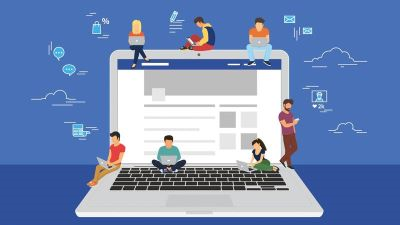


# 1. Hypothesis

In this report I am going to be answering my own questions about my off facebook activity. The questions I am wanting to answer in this data report are: Are more apps targeting my off facebook activity or are more websites targeting my off facebook activity? What app or website has targeted my off facebook activity the most? Are all categories of data equal?

I hypothesize that more websites target my off facebook activity because I don't use very many apps, and I use my laptop more when it comes to looking something up. I also believe that it will be an app that has targeted my facebook the most because apps seem to be more more persistent with ads. Lastly I think that the categories of data will not be used equally because I think one method of advertising will be used more than another. 

### Starting

I imported json, datetime, numpy, time, and pandas to use their libraries for Python 3

In [176]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

###  2. The Data

After importing those libraries I am loading in the Facebook data I downloaded. I accessed the file data from my computer. I believe that this data I've downloaded is trustworthy and informative.

In [177]:
with open(r"C:\Users\ntedw\OneDrive\Documents\Facbook Data\facebook-noahedwards927\ads_and_businesses\your_off-facebook_activity.json") as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

In [178]:
type(act['off_facebook_activity'])

list

Here I am loading in all of the websites and apps that have targeted my facebook. Each dictionary for each website and app includes the key "events" whose value is a list of events each stored as a yet another dictionary. The information for each event includes an identifying number(id), the kind of event logged(Ex.PAGE VIEW), and the time each event occurred(timestamp).

In [179]:
act['off_facebook_activity'][0]

{'name': 'kent.edu',
 'events': [{'id': 661904321318543,
   'type': 'PAGE_VIEW',
   'timestamp': 1612073760},
  {'id': 155183341733912, 'type': 'PAGE_VIEW', 'timestamp': 1612073760},
  {'id': 597287964493316, 'type': 'PAGE_VIEW', 'timestamp': 1612073760},
  {'id': 661904321318543, 'type': 'PAGE_VIEW', 'timestamp': 1611360660},
  {'id': 155183341733912, 'type': 'PAGE_VIEW', 'timestamp': 1611360660},
  {'id': 597287964493316, 'type': 'PAGE_VIEW', 'timestamp': 1611360660},
  {'id': 661904321318543, 'type': 'PAGE_VIEW', 'timestamp': 1611359520},
  {'id': 155183341733912, 'type': 'PAGE_VIEW', 'timestamp': 1611359520},
  {'id': 597287964493316, 'type': 'PAGE_VIEW', 'timestamp': 1611359520},
  {'id': 597287964493316, 'type': 'PAGE_VIEW', 'timestamp': 1611358320},
  {'id': 661904321318543, 'type': 'PAGE_VIEW', 'timestamp': 1611358320},
  {'id': 155183341733912, 'type': 'PAGE_VIEW', 'timestamp': 1611358320},
  {'id': 661904321318543, 'type': 'PAGE_VIEW', 'timestamp': 1611080280},
  {'id': 15518

In [180]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [181]:
act['off_facebook_activity'][0]['events'][0]['type']

'PAGE_VIEW'

In [182]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'PAGE_VIEW'

True

Here a loop is created to access all of the data inside each dictionary

In [183]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

Here the first line creates an empty DataFrame with column names that you can choose to name whatever you want. The rest of the lines then assign the lists of data to those columns. You are able to see this in the chart below.

In [184]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,kent.edu,325,0,0,0,0,0,325
1,modelousa.com,1,0,0,0,0,0,1
2,Peacock TV,741,0,741,0,0,0,0
3,GOAT â Sneakers & Apparel,1,0,1,0,0,0,0
4,Trivia Crack 2,3,2,0,0,0,0,0


Here I am importing stats from scipy so I am able to use a chi-test contingency

In [185]:
from scipy import stats

In [186]:
obs = np.array([appbyevent['Page Views'][:4], appbyevent['Event Count'][:4]])
obs

array([[325,   1,   0,   0],
       [325,   1, 741,   1]], dtype=int64)

Here I am using a chi-test contimgency

In [187]:
stats.chi2_contingency(obs)

(484.24531835205994,
 1.2383175824031824e-104,
 3,
 array([[1.52008608e+02, 4.67718795e-01, 1.73289813e+02, 2.33859397e-01],
        [4.97991392e+02, 1.53228121e+00, 5.67710187e+02, 7.66140603e-01]]))

I am loading in different apps and websites based on Event Count.

In [188]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 7]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
0,kent.edu,325,0,0,0,0,325
2,Peacock TV,741,0,741,0,0,0
11,quizlet.com,13,0,1,0,12,0
12,walmart.com,42,0,5,0,33,1
13,Best Buy,35,0,0,0,0,35
33,adorama.com,9,0,1,0,7,1
42,gamestop.com,75,0,0,0,0,75
43,Walmart.com,8,0,0,0,0,8
53,Macy's,8,0,0,0,0,6
58,xbox.com,9,0,1,0,2,4


In [189]:
sub_apps['App']

0                    kent.edu
2                  Peacock TV
11                quizlet.com
12                walmart.com
13                   Best Buy
33                adorama.com
42               gamestop.com
43                Walmart.com
53                     Macy's
58                   xbox.com
99                kinguin.net
142    Call of DutyÂ®: Mobile
Name: App, dtype: object

I am creating a category to show which apps are apps and which apps are websites. The list below are the categories of the apps above.

In [190]:
cats = ['site','app','site','site','app','site','site','site','site','site','site','app']
cats

['site',
 'app',
 'site',
 'site',
 'app',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'app']

Here I am loading in the category that was just made. You can see what each app is on the right side of the chart.

In [191]:
sub_apps['category'] = cats
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,category
0,kent.edu,325,0,0,0,0,325,site
2,Peacock TV,741,0,741,0,0,0,app
11,quizlet.com,13,0,1,0,12,0,site
12,walmart.com,42,0,5,0,33,1,site
13,Best Buy,35,0,0,0,0,35,app
33,adorama.com,9,0,1,0,7,1,site
42,gamestop.com,75,0,0,0,0,75,site
43,Walmart.com,8,0,0,0,0,8,site
53,Macy's,8,0,0,0,0,6,site
58,xbox.com,9,0,1,0,2,4,site


## 3. Data Visualization

The chart below was made to show how many websites/apps targeted my facebook. You can see that more websites targeted my facebook data but there was one app that targeted my facebook the most.

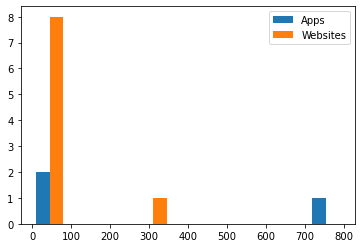

In [192]:
bins = np.linspace(0, 800, 10)
apps = sub_apps['Event Count'].loc[sub_apps['category'] == 'app']
sites = sub_apps['Event Count'].loc[sub_apps['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

This chart was made to show which website/app targeted my facebook the most. You can see that the app Peacock TV targeted my data the most by a long shot. 

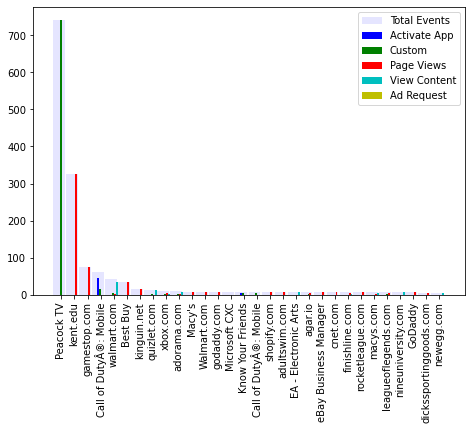

In [193]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:30], color = 'b', alpha = .1, width = .90)
ax.bar(X + 0.00, appbyevent['Activate App'][0:30], color='b', width = .15)
ax.bar(X + 0.15, appbyevent['Custom'][0:30], color='g', width = .15)
ax.bar(X + 0.30, appbyevent['Page Views'][0:30], color='r', width = .15)
ax.bar(X + 0.45, appbyevent['View Content'][0:30], color='c', width = .15)
ax.bar(X+.60, appbyevent['Ad Request'][0:30], color = 'y', width = .15)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events' ,'Activate App', 'Custom', 'Page Views', 'View Content', 'Ad Request'])
plt.show()

## 4. T-Test

I am running this ttest to find out if each dictionary was used equally when targeting my facebook.

In [194]:
ttest_eventcount = stats.ttest_ind(sub_apps['Event Count'].loc[sub_apps['category'] == 'app'], sub_apps['Event Count'].loc[sub_apps['category'] == 'site'])
ttest_eventcount.statistic

1.6601406058546977

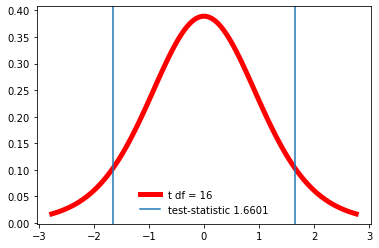

In [195]:
df1 = (len(apps) - 1) + (len(sites) - 1)
#df2 = 100
fig, ax1 = plt.subplots(1,1)
x1 = np.linspace(stats.t.ppf(0.01, df1), stats.t.ppf(0.99, df1), 100)
ax1.plot(x1, stats.t.pdf(x1, df1), 'r-', lw = 5, label = 't df = 16')
#x2 = np.linspace(stats.t.ppf(0.01, df2), stats.t.ppf(0.99, df2), 100)
#ax1.plot(x2, stats.t.pdf(x2, df2), 'k-', lw = 5, label = 't df = 100')
ax1.axvline(x=ttest_eventcount.statistic, label = 'test-statistic 1.6601')
ax1.axvline(x=-ttest_eventcount.statistic, label = '_nolegend_')
ax1.legend(loc = 'best', frameon = False)
plt.show()

Here you can see there is a 12.8% chance that each dictionary is equal. This means that they are not equal.

In [196]:
ttest_eventcount.pvalue

0.12787252674385338

## 5. Conclusions

Was my hypothesis correct? Yes, all three of my hypothesis's were right.

I figured out that websites target my facebook more than apps. I did not find this supprsing as I said in my hypothesis I am using websites more than apps.

I was able to find that the app Peaccock TV targeted my facebook 741 times using a custom approach. I was correct about apps being persistent. I've only used the app Peacock TV one time to watch a movie and never ended up watching the movie. Now the app has targeted my facebook 741 times. I find that mind blowing.

Lastly I found that each dictionary was not used equally. 'Custom' being used 741 times on one app made me believe my hypothesis was right even more.

Although I was right about my hypothesis, I am happy to have a more decisive answer.



## 6. Limitations, Alternative Approaches, & Next Steps

While working on this report I thought about more questions I could answer with this data. One question being "What is the total amount of 'Events' that each dictionary had?" I am definitely limited to what I can do in python 3 and jupyter notebook because I am not very experienced with the code. I have a lot to learn before I can answer some of the questions I want to know.

The next step for me is to continue learning more about data, and coding. 

Overall, I am excited to learn more and gradually get better over time. 